# Analyze and visualize sentiment patterns of apple brand 

##### This analysis provides insights into public opinion about the brand based on the ratings given by users. By focusing on ratings above 4 stars, we are specifically looking at positive sentiment towards the brand's products.

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\rocky\Downloads\archive (1)\apple_products.csv')
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [6]:
print(df.isnull().sum())
df.dropna(subset=['Product Name', 'Sale Price', 'Star Rating'], inplace=True)
df['Number Of Ratings'].fillna(0, inplace=True)
df['Number Of Reviews'].fillna(0, inplace=True)
df['Discount Percentage'].fillna(0, inplace=True)
df['Sale Price'] = df['Sale Price'].astype(float)
df['Mrp'] = df['Mrp'].astype(float)
df['Discount Percentage'] = df['Discount Percentage'].astype(float)
df['Number Of Ratings'] = df['Number Of Ratings'].astype(int)
df['Number Of Reviews'] = df['Number Of Reviews'].astype(int)
df['Star Rating'] = df['Star Rating'].astype(float)
df['Ram'] = df['Ram'].astype(str) 
df.head()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900.0,49900.0,0.0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900.0,84900.0,0.0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900.0,84900.0,0.0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000.0,77000.0,0.0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000.0,77000.0,0.0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [7]:
avg_ratings = df.groupby('Product Name')['Star Rating'].mean().reset_index()
total_ratings = df.groupby('Product Name')['Number Of Ratings'].sum().reset_index()
df['total revenue'] = df['Sale Price'] * df['Number Of Ratings']
total_revenue = df.groupby('Product Name')['total revenue'].sum().reset_index()
print(avg_ratings)
print(total_ratings)
print(total_revenue)

                                         Product Name  Star Rating
0                     APPLE iPhone 11 (Black, 128 GB)          4.6
1                      APPLE iPhone 11 (Black, 64 GB)          4.6
2                     APPLE iPhone 11 (Purple, 64 GB)          4.6
3                       APPLE iPhone 11 (Red, 128 GB)          4.6
4                        APPLE iPhone 11 (Red, 64 GB)          4.6
..                                                ...          ...
57  Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...          4.6
58  Apple iPhone XR (Black, 128 GB) (Includes EarP...          4.6
59  Apple iPhone XR (Black, 64 GB) (Includes EarPo...          4.6
60  Apple iPhone XR (Coral, 128 GB) (Includes EarP...          4.6
61  Apple iPhone XR (White, 128 GB) (Includes EarP...          4.6

[62 rows x 2 columns]
                                         Product Name  Number Of Ratings
0                     APPLE iPhone 11 (Black, 128 GB)              43470
1                      APPL

## Average Star Rating for Each iPhone Model

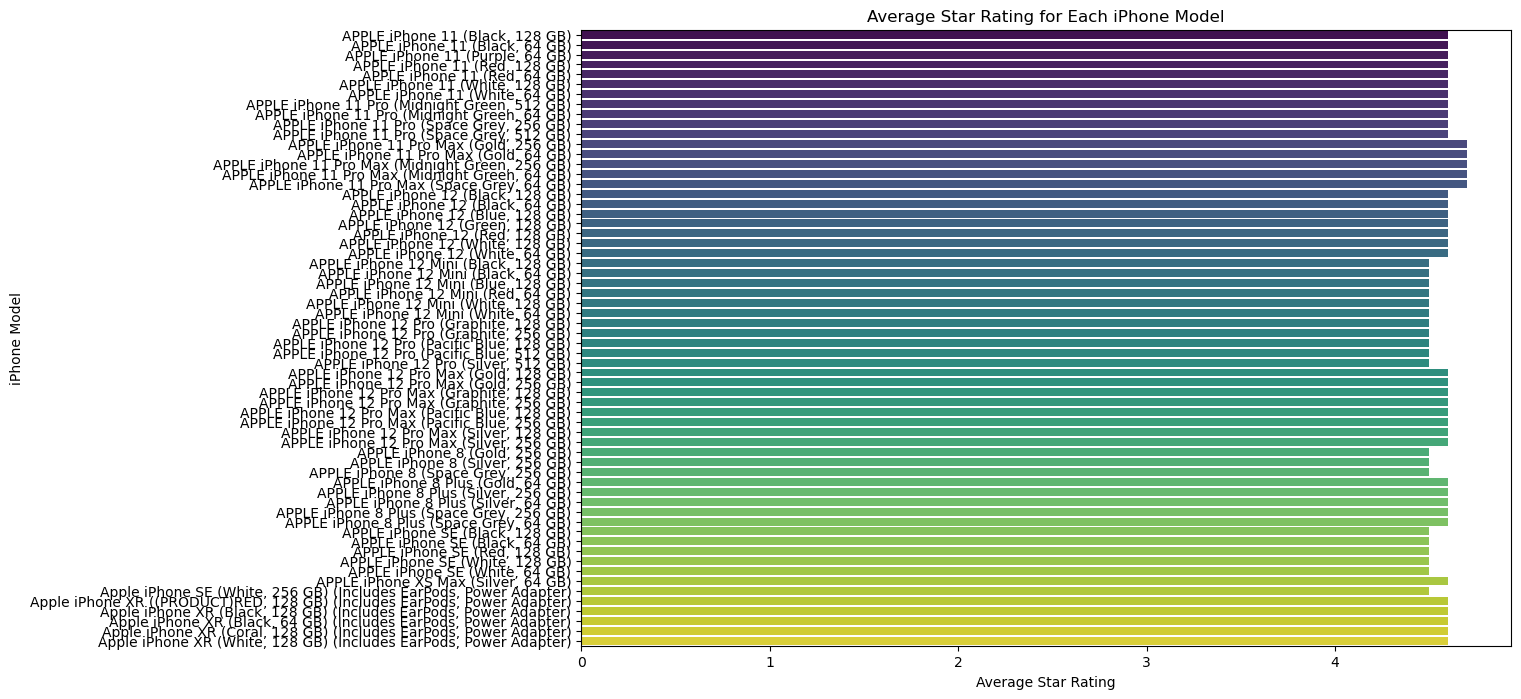

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_ratings = df.groupby('Product Name')['Star Rating'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Star Rating', y='Product Name', data=avg_ratings, palette='viridis')
plt.title('Average Star Rating for Each iPhone Model')
plt.xlabel('Average Star Rating')
plt.ylabel('iPhone Model')
plt.show()

## Total Number of Ratings for Each iPhone Model

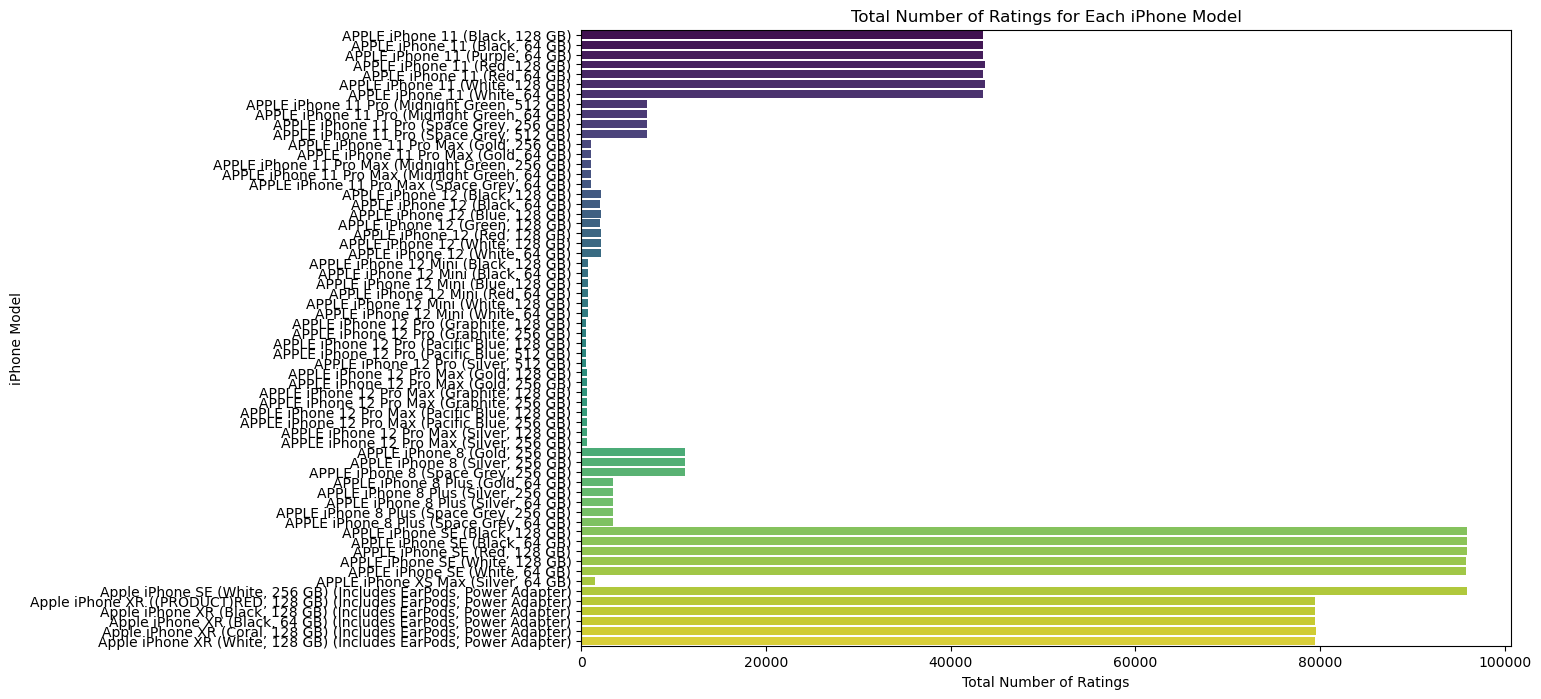

In [9]:
total_ratings = df.groupby('Product Name')['Number Of Ratings'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Number Of Ratings', y='Product Name', data=total_ratings, palette='viridis')
plt.title('Total Number of Ratings for Each iPhone Model')
plt.xlabel('Total Number of Ratings')
plt.ylabel('iPhone Model')
plt.show()

## Total Revenue for Each iPhone Model

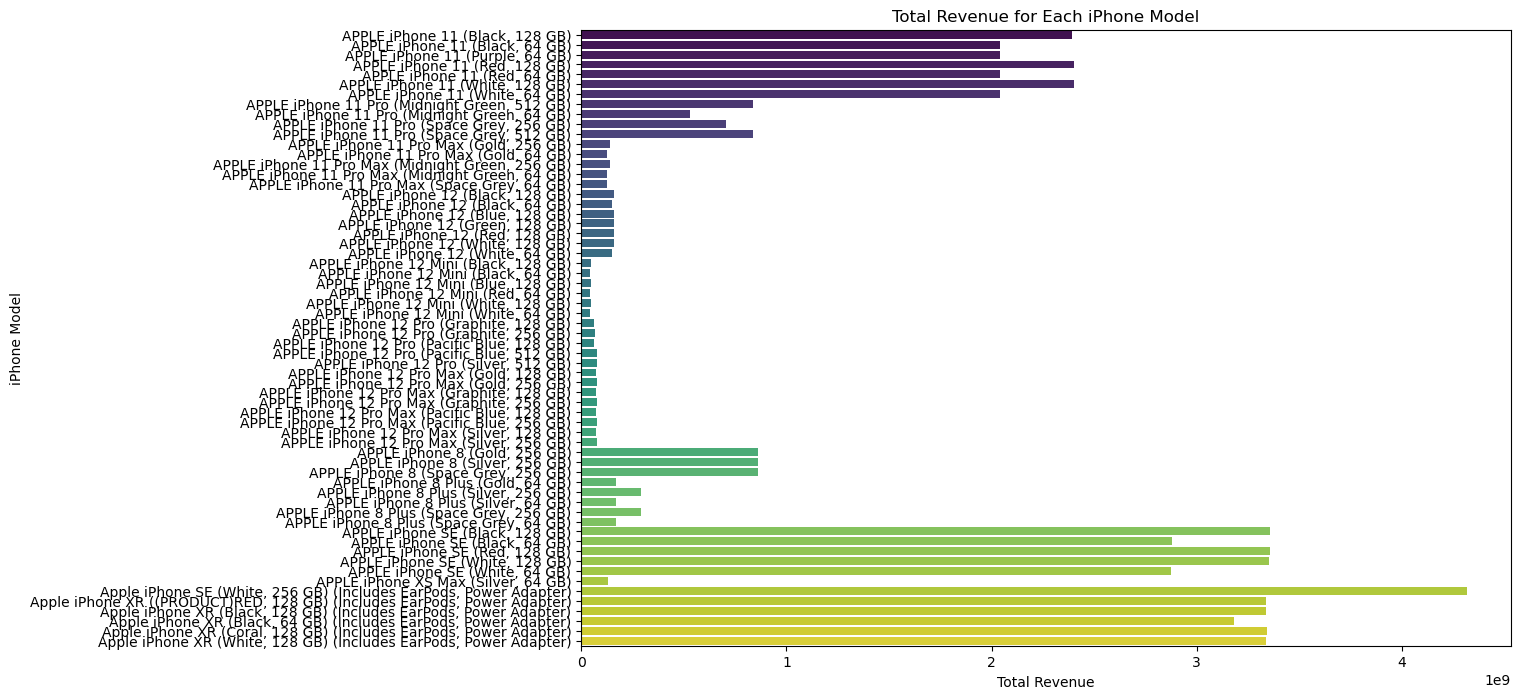

In [10]:
total_revenue = df.groupby('Product Name')['total revenue'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='total revenue', y='Product Name', data=total_revenue, palette='viridis')
plt.title('Total Revenue for Each iPhone Model')
plt.xlabel('Total Revenue')
plt.ylabel('iPhone Model')
plt.show()

## Total Number of Ratings for Each iPhone Model

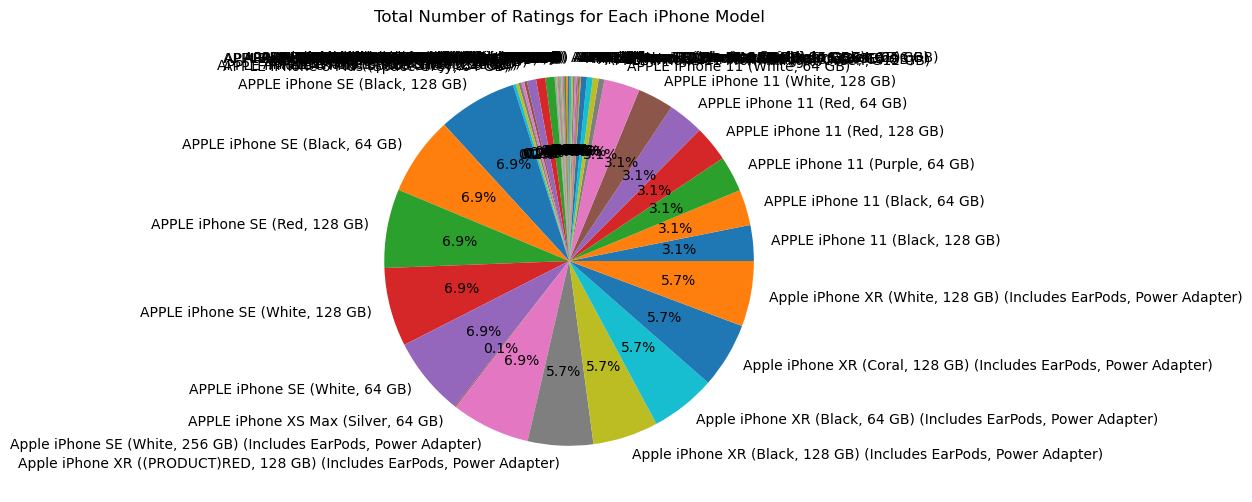

In [16]:
import matplotlib.pyplot as plt
total_ratings_per_model = df.groupby('Product Name')['Number Of Ratings'].sum()
plt.figure(figsize=(8, 6))
total_ratings_per_model.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Number of Ratings for Each iPhone Model')
plt.ylabel('')
plt.show()

## Total Number of Ratings Above 4 Stars for Each iPhone Model

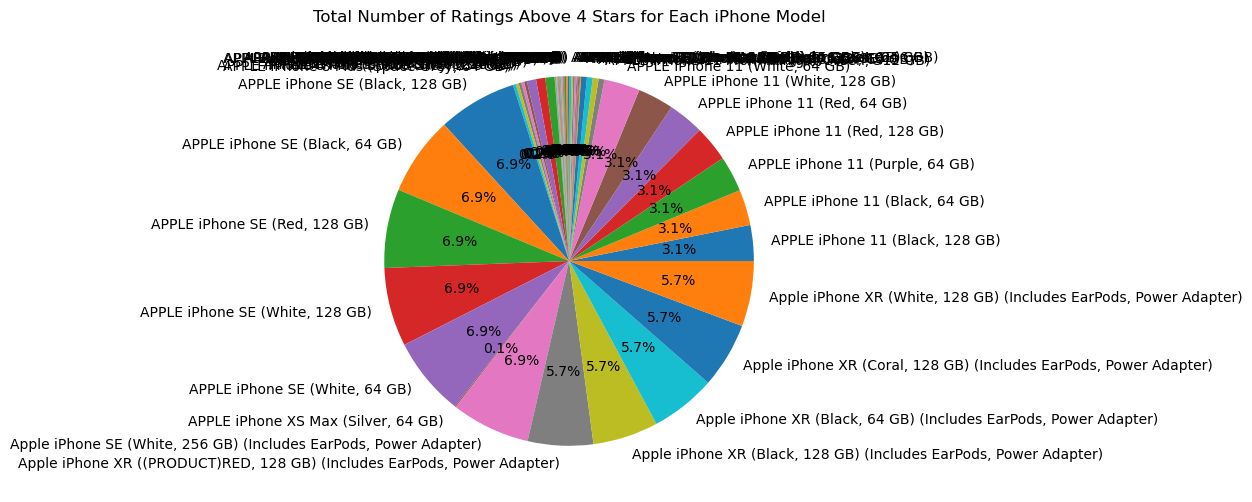

In [21]:
import matplotlib.pyplot as plt
df_above_4_stars = df[df['Star Rating']>4]
total_ratings_above_4_stars = df_above_4_stars.groupby('Product Name')['Number Of Ratings'].sum()
plt.figure(figsize=(8, 6))
total_ratings_above_4_stars.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Number of Ratings Above 4 Stars for Each iPhone Model')
plt.ylabel('')
plt.show()